In [85]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Import raw cycling Data

In [86]:
trips_raw = pd.read_csv('trips_raw_data.csv')

C:\Users\aliqm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Explore data types and rows in trips_raw_data.csv

In [87]:
trips_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8039088 entries, 0 to 8039087
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   Trip Id              int64  
 2   Subscription Id      float64
 3   Trip Duration        int64  
 4   Start Station Id     float64
 5   Start Time           object 
 6   Start Station Name   object 
 7   End Station Id       float64
 8   End Time             object 
 9   End Station Name     object 
 10  Bike Id              float64
 11  User Type            object 
 12  merge_time           object 
 13  Date/Time            object 
 14  Temp (°C)            float64
 15  Dew Point Temp (°C)  float64
 16  Rel Hum (%)          float64
 17  Wind Dir (10s deg)   float64
 18  Wind Spd (km/h)      float64
 19  Visibility (km)      float64
 20  Stn Press (kPa)      float64
 21  Hmdx                 float64
 22  Wind Chill           float64
 23  Weather              object 
dty

In [88]:
trips_raw.head()

,Unnamed: 0,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,...,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather
0,58,712441,NaN,274,7006.0,2017-01-01 00:03:00-05:00,Bay St / College St (East Side),7021.0,2017-01-01 00:08:00-05:00,Bay St / Albert St,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
1,59,712442,NaN,538,7046.0,2017-01-01 00:03:00-05:00,Niagara St / Richmond St W,7147.0,2017-01-01 00:12:00-05:00,King St W / Fraser Ave,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
2,60,712443,NaN,992,7048.0,2017-01-01 00:05:00-05:00,Front St W / Yonge St (Hockey Hall of Fame),7089.0,2017-01-01 00:22:00-05:00,Church St / Wood St,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
3,61,712444,NaN,1005,7177.0,2017-01-01 00:09:00-05:00,East Liberty St / Pirandello St,7202.0,2017-01-01 00:26:00-05:00,Queen St W / York St (City Hall),...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN
4,62,712445,NaN,645,7203.0,2017-01-01 00:14:00-05:00,Bathurst St/Queens Quay(Billy Bishop Airport),7010.0,2017-01-01 00:25:00-05:00,King St W / Spadina Ave,...,1.5,-3.6,69.0,26.0,39.0,16.1,99.81,NaN,NaN,NaN


# Cleaning Data

Removing all row except Trip ID, Trip Duration, Start Time and User Type

In [89]:
trips_raw = trips_raw[['Trip Id', 'Trip Duration', 'Start Time', 'User Type']]

Converting Start Time Column to a datetime format

In [90]:
trips_raw ['Start Time'] = pd.DatetimeIndex(trips_raw ['Start Time'])

Analyzing how many different user types there are 

In [91]:
unique_subscriptions = trips_raw['User Type'].unique()
unique_subscriptions

array([nan, 'Annual Member', 'Casual Member'], dtype=object)

Removing all nan from the User Type columns

In [92]:
trips_raw = trips_raw[~trips_raw['User Type'].isna()]

Determinging the time range for the data

In [93]:
min_date = trips_raw['Start Time'].min()
max_date = trips_raw['Start Time'].max()
print(min_date)
print(max_date)

2018-01-01 00:47:00-05:00
2020-12-10 23:59:00-05:00


Looks like before 2018-01-01, user types were not tracked. Also, last 21 days of December 2020 are missing from the data set. December will be removed from reach year to ensure we are comparing the same amounts of time. 

In [94]:
trips_raw = trips_raw[trips_raw['Start Time'].dt.month!=12]

Split data set into casual and annual users 

In [95]:
casual_user = trips_raw[trips_raw['User Type'] == 'Casual Member']
annual_user = trips_raw[trips_raw['User Type'] == 'Annual Member']

Grouping data by year

In [96]:
casual_user['Year'] = casual_user['Start Time'].dt.year
annual_user['Year'] = annual_user['Start Time'].dt.year

<ipython-input-96-ebccdff795b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casual_user['Year'] = casual_user['Start Time'].dt.year
<ipython-input-96-ebccdff795b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annual_user['Year'] = annual_user['Start Time'].dt.year


In [97]:
number_casual_users = casual_user.groupby(['Year']).size()
number_annual_users = annual_user.groupby(['Year']).size()

In [98]:
number_casual_users

Year
2018    281463
2019    487620
2020    805593
dtype: int64

In [99]:
number_annual_users

Year
2018    1475958
2019    1733834
2020    1577893
dtype: int64

# Plotting Data

<ipython-input-101-afe4b6cce782>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(number_casual_users.index)


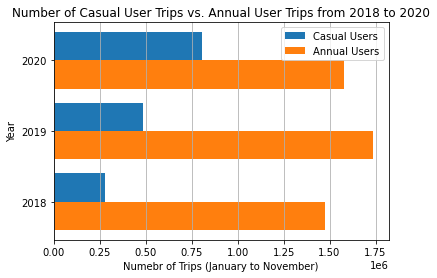

In [101]:
fig, ax = plt.subplots()

p1 = ax.barh(np.arange(3)+0.4, number_casual_users, 0.4, align = 'center')
p2 = ax.barh(np.arange(3), number_annual_users, 0.4, align = 'center')

ax.set_yticklabels(number_casual_users.index)

ax.set_yticks(np.arange(3)+0.4/2)

ax.xaxis.grid(True)
ax.yaxis.grid(False)

ax.set_xlabel('Numebr of Trips (January to November)')
ax.set_ylabel('Year')
ax.set_title('Number of Casual User Trips vs. Annual User Trips from 2018 to 2020')

ax.legend((p1[0], p2[0]), ('Casual Users', 'Annual Users'), 
          loc='best')

The amount of casual users has been steadily increasing. The amount of annual users has been fluctuating. 